In [370]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import seaborn as sn
import matplotlib.pyplot as plt

df = pd.read_csv("Accidental_Drug_Related_Deaths_2012-2018.csv", encoding='cp1252')

In [371]:
# Data Preprocessing
#1) Data Restructuring - table vertical decomposition
# remove features do not affect on accidental drug with death
df.drop(['ID', 'Date', 'DateType', 'ResidenceCity', 'ResidenceCounty', 'ResidenceState', 'DeathCity', 'DeathCounty',
        'Location', 'LocationifOther', 'DescriptionofInjury', 'InjuryPlace', 'InjuryCity', 'InjuryCounty', 'InjuryState', 
         'COD', 'OtherSignifican', 'DeathCityGeo', 'ResidenceCityGeo', 'InjuryCityGeo', 'MannerofDeath',
        'OpiateNOS', 'AnyOpioid'], 1, inplace=True)
print(df.head(5))

    Age     Sex          Race Heroin Cocaine Fentanyl FentanylAnalogue  \
0   NaN     NaN           NaN    NaN     NaN        Y              NaN   
1  48.0    Male         Black    NaN       Y      NaN              NaN   
2  30.0  Female         White      Y       Y      NaN              NaN   
3  23.0    Male         White      Y     NaN        Y              NaN   
4  22.0    Male  Asian, Other    NaN     NaN        Y              NaN   

  Oxycodone Oxymorphone Ethanol Hydrocodone Benzodiazepine Methadone Amphet  \
0       NaN         NaN     NaN           Y              Y       NaN    NaN   
1       NaN         NaN     NaN         NaN            NaN       NaN    NaN   
2       NaN         NaN     NaN         NaN            NaN       NaN    NaN   
3       NaN         NaN     NaN         NaN            NaN       NaN    NaN   
4       NaN         NaN     NaN         NaN            NaN       NaN    NaN   

  Tramad Morphine_NotHeroin Hydromorphone Other Death  
0    NaN                

In [372]:
# 2) Data Restructuring - data value changes
# missing data
print("- missing data before -")
print(df.isnull().sum()) # check missing data

df = df.replace('Unknown', np.nan) # replace 'Unknown' to NaN

print("- missing data after  -")
print(df.isnull().sum()) # check missing data

- missing data before -
Age                      3
Sex                      6
Race                    13
Heroin                2576
Cocaine               3583
Fentanyl              2873
FentanylAnalogue      4715
Oxycodone             4496
Oxymorphone           4996
Ethanol               3857
Hydrocodone           4986
Benzodiazepine        3762
Methadone             4631
Amphet                4945
Tramad                4975
Morphine_NotHeroin    5062
Hydromorphone         5080
Other                 4670
Death                    8
dtype: int64
- missing data after  -
Age                      3
Sex                      7
Race                    36
Heroin                2576
Cocaine               3583
Fentanyl              2873
FentanylAnalogue      4715
Oxycodone             4496
Oxymorphone           4996
Ethanol               3857
Hydrocodone           4986
Benzodiazepine        3762
Methadone             4631
Amphet                4945
Tramad                4975
Morphine_NotHeroin   

In [373]:
# replace the NaN
df[['Age']] = df[['Age']].fillna(df[['Age']].mean()) #fill with mean
df[['Sex']] = df[['Sex']].fillna(method='bfill') #fill with bfill
df[['Race']] = df[['Race']].fillna(method='bfill') # fill with bfill
df[['Other']] = df[['Other']].replace(np.nan, '0') # replace 'Unknown' to 0
df = df.dropna(subset=['Death'])
print("- missing data after -")
print(df.isnull().sum()) # check missing data

- missing data after -
Age                      0
Sex                      0
Race                     0
Heroin                2570
Cocaine               3579
Fentanyl              2869
FentanylAnalogue      4707
Oxycodone             4488
Oxymorphone           4988
Ethanol               3851
Hydrocodone           4978
Benzodiazepine        3755
Methadone             4624
Amphet                4937
Tramad                4967
Morphine_NotHeroin    5054
Hydromorphone         5072
Other                    0
Death                    0
dtype: int64


In [374]:
# Text preprocessing
# Text tokenization the race
print(df['Race'].value_counts())
df['Race'] = df.Race.str.split(',').str[0] # 여러개의 인종이 있는 경우 앞에 있는 인종 선택
print('\n\n',df['Race'].value_counts())

White                     4030
Hispanic, White            562
Black                      434
Hispanic, Black             24
Asian, Other                18
Asian Indian                14
Other                       11
Chinese                      2
Native American, Other       1
Hawaiian                     1
Name: Race, dtype: int64


 White              4030
Hispanic            586
Black               434
Asian                18
Asian Indian         14
Other                11
Chinese               2
Native American       1
Hawaiian              1
Name: Race, dtype: int64


In [375]:
# column value of df['Other']
listt = df['Other'].values.tolist()
listt = [listt for listt in listt if str(listt) != '0']

In [376]:
# 약물
print('- Before -\n')
print(df['Fentanyl'].value_counts())
print('\n',df['Morphine_NotHeroin'].value_counts())
print('\n',df['Other'].value_counts())

df[['Fentanyl']] = df[['Fentanyl']].replace(['Y-A', 'Y POPS', 'Y (PTCH)'], 'Y') # replace 'Y-A', 'Y POPS', 'Y (PTCH)' to 'Y'
df[['Morphine_NotHeroin']] = df[['Morphine_NotHeroin']].replace(['STOLE MEDS', 'YES', 'NO RX BUT STRAWS', 'PCP NEG'], 'Y') # replace 'Y-A', 'Y POPS', 'Y (PTCH)' to 'Y'
df[['Other']] = df[['Other']].replace([listt], 'Y') # replace 'Y-A', 'Y POPS', 'Y (PTCH)' to 'Y'

print('\n- After -\n')
print(df['Fentanyl'].value_counts())
print('\n',df['Morphine_NotHeroin'].value_counts())
print('\n',df['Other'].value_counts())

- Before -

Y           2224
Y-A            2
Y (PTCH)       1
Y POPS         1
Name: Fentanyl, dtype: int64

 Y                   39
STOLE MEDS           1
NO RX BUT STRAWS     1
PCP NEG              1
YES                  1
Name: Morphine_NotHeroin, dtype: int64

 0                         4663
PCP                         48
morphine                    29
HYDROMORPH                  28
Bupren                      25
BUPREN                      23
pcp                         16
MORPHINE                    15
U-47700                     15
MORPH                       11
Buprenor                    10
morphine RX                  9
OPIATE                       9
opiates                      8
BUPRENOR                     6
MDMA                         5
opiate                       5
Morphine                     5
ketamine                     4
BUPRENO                      4
carfentanil                  4
hydromorph                   4
Bupreno                      4
HYDR-MOR            

In [377]:
# 나이 그룹짓기
# 영유아(0~5세) : A
# 아동, 청소년(6~18세) : B
# 청년(19~34세) : C
# 중장년(35~64세) : D
# 노인(65세~) : E
df['Age_band'] = 0
df.loc[df['Age']<=5, 'Age_band'] = '0'
df.loc[(df['Age']>5)&(df['Age']<=18), 'Age_band'] = '1'
df.loc[(df['Age']>18)&(df['Age']<=34), 'Age_band'] = '2'
df.loc[(df['Age']>34)&(df['Age']<=64), 'Age_band'] = '3'
df.loc[df['Age']>64, 'Age_band'] = '4'

print(df['Age_band'].value_counts())

3    3330
2    1617
4     124
1      26
Name: Age_band, dtype: int64


In [378]:
# Feature Engineering
# Label Encoding
labelEncoder = LabelEncoder()

# 0: Female, 1: Male
labelEncoder.fit(df['Sex'])
df['Sex'] = labelEncoder.transform(df['Sex'])

# 0: Asian, 1: Asian Indian, 2: Black, 3: Chinese, 4: Hawaiian, 5: Hispanic, 6: Hispanic American, 7: Other, 8: White
labelEncoder.fit(df['Race'])
df['Race'] = labelEncoder.transform(df['Race'])

# 0: No, 1: Yes
labelEncoder.fit(df['Death'])
df['Death'] = labelEncoder.transform(df['Death'])

In [379]:
# Feature Encoding
# Drug's value change
df = df.replace('Y', 1) # replace 'Y' to 1
df = df.replace(np.nan, 0) # replace 'np.nan' to 0

In [380]:
# Feature Engineering
# Feature Creation
df['Drug']=df.iloc[:, 3:18].sum(1) # the number of drugs taken by one person

print(df['Drug'].head(10))

0    3.0
1    1.0
2    2.0
3    2.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: Drug, dtype: float64


In [381]:
# classifier attribute to target
X = df[['Sex', 'Race', 'Age_band', 'Drug']] # attribute
y = df['Death'].values # target

In [382]:
# Feature Engineering
# normalization
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# X_ = StandardScaler().fit_transform(X)
# pca = PCA(n_components=4)
# pc = pca.fit_transform(X_)
X = StandardScaler().fit_transform(X)

In [383]:
#Calculation kfold's accuracy
def cal(model):
    cv_scores = cross_val_score(model, X, y, cv=10)
    print(cv_scores)
    print('cv_scores mean:{}'.format(np.mean(cv_scores)))
    print()

Dscore = None
Dmodel = None

In [384]:
#Pick Decision Tree's max model
def update(model): 
    global Dmodel, Dscore
    cv_scores = cross_val_score(model, X, y, cv=10)
    n_score = np.mean(cv_scores)
    if (Dscore == None):
        Dscore = n_score
        Dmodel = model
    elif(n_score > Dscore):
        Dscore = n_score
        Dmodel = model

Cscore = None
Cmodel = None

#DecstionTree's all case
for case in['gini', 'entropy']:
    print("DecisionTree = " , case)
    model = DecisionTreeClassifier(criterion = case, max_depth=10, random_state=0)
    cal(model)
    update(model)

DecisionTree =  gini
[0.69667319 0.81372549 0.84313725 0.80784314 0.79803922 0.80196078
 0.78781925 0.79764244 0.77210216 0.86640472]
cv_scores mean:0.798534763799214

DecisionTree =  entropy
[0.69667319 0.81372549 0.84313725 0.80980392 0.79803922 0.80196078
 0.78781925 0.79764244 0.7740668  0.86640472]
cv_scores mean:0.7989273058848105



In [385]:
#Pick Logistic Regression's max model
def update2(model):
    global Cmodel, Cscore
    cv_scores = cross_val_score(model, X, y, cv=10)
    n_score = np.mean(cv_scores)
    if (Cscore == None):
        Cscore = n_score
        Cmodel = model
    elif(n_score > Cscore):
        Cscore = n_score
        Cmodel = model

Sscore = None
Smodel = None

#Logistic Regression's all case
for case in['liblinear', 'lbfgs', 'sag']:
    for max in [50, 100,200]:
        print("Logistic = " , "solver :  " , case , " / max_iter : " , max)
        model = LogisticRegression(solver = case, max_iter = max)
        cal(model)
        update2(model)

Logistic =  solver :   liblinear  / max_iter :  50
[0.70254403 0.82156863 0.84901961 0.81372549 0.79803922 0.80196078
 0.79371316 0.80157171 0.7740668  0.86640472]
cv_scores mean:0.8022614141870112

Logistic =  solver :   liblinear  / max_iter :  100
[0.70254403 0.82156863 0.84901961 0.81372549 0.79803922 0.80196078
 0.79371316 0.80157171 0.7740668  0.86640472]
cv_scores mean:0.8022614141870112

Logistic =  solver :   liblinear  / max_iter :  200
[0.70254403 0.82156863 0.84901961 0.81372549 0.79803922 0.80196078
 0.79371316 0.80157171 0.7740668  0.86640472]
cv_scores mean:0.8022614141870112

Logistic =  solver :   lbfgs  / max_iter :  50
[0.70254403 0.82156863 0.84901961 0.81372549 0.79803922 0.80196078
 0.79371316 0.80157171 0.7740668  0.86640472]
cv_scores mean:0.8022614141870112

Logistic =  solver :   lbfgs  / max_iter :  100
[0.70254403 0.82156863 0.84901961 0.81372549 0.79803922 0.80196078
 0.79371316 0.80157171 0.7740668  0.86640472]
cv_scores mean:0.8022614141870112

Logistic =

[Decision Tree]


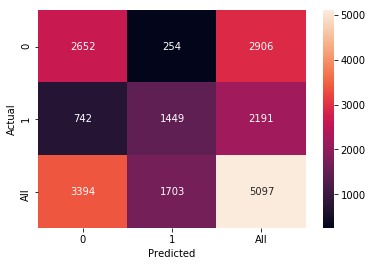

[Logistic Regression]


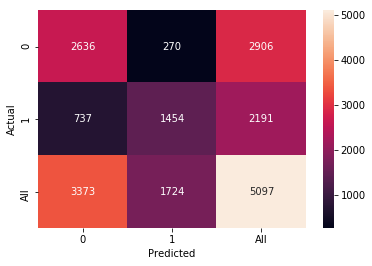

In [386]:
#Training max model
Dmodel = Dmodel.fit(X, y)
Cmodel = Cmodel.fit(X, y)

#Decision Tree's confusion matrix
print('[Decision Tree]')
confusion_matrix = pd.crosstab(y, Dmodel.predict(X), rownames=['Actual'], colnames=['Predicted'], margins= True)
sn.heatmap(confusion_matrix, annot=True, fmt = 'd')
plt.show()

#Logistic Regression's confusion matrix
print('[Logistic Regression]')
confusion_matrix = pd.crosstab(y, Cmodel.predict(X), rownames=['Actual'], colnames=['Predicted'], margins= True)
sn.heatmap(confusion_matrix, annot=True, fmt = 'd')
plt.show()